# Seal detection demo
This demo shows the detection of seals and polar bears in aerial infrared images taken by the National Oceanic and Atmospheric Administration (NOAA).

In [4]:
import requests
from io import BytesIO
import random
import glob
import PIL.Image

In [2]:
requests.get('http://localhost:8081/').text

'Health check OK'

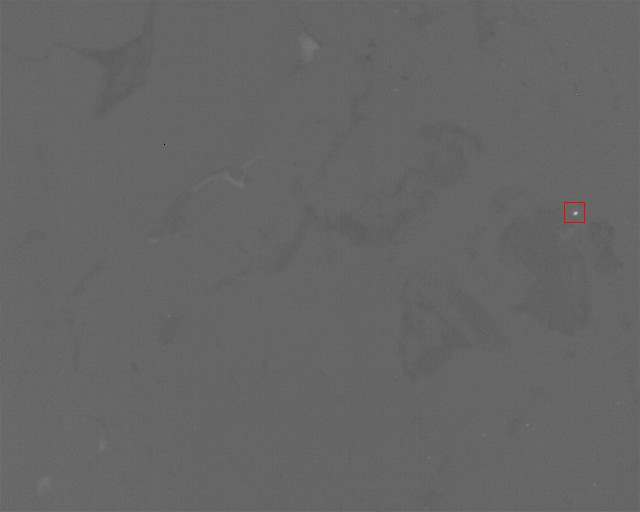

In [33]:
#image_path = '/data/seals/seal_data_vott/sealdata_large_IR_N/test/CHESS_FL12_C_160421_214630.573_THERM-8BIT-N.PNG'
image_path = random.choice(glob.glob('/data/seals/seal_data_vott/sealdata_large_IR_N/test/*_THERM-8BIT-N.PNG'))
with open(image_path,'rb') as f:
    im = PIL.Image.open(BytesIO(requests.post('http://localhost:8081/v1/pytorch_api/detect', 
                        data=open(image_path, 'rb'),
                        headers={'Content-Type':'image/png'}).content))
im

### Notes
The current example code does not support multi-part post requests, hence you need to pass the images using the data parameter of requests.post instead of the files parameter as shown above. Below would be the multi part variant, which is not supported yet

In [ ]:
# Multiplart variant
# Currently not supported
image_path = '/data/seals/seal_data_vott/sealdata_large_IR_N/test/CHESS_FL12_C_160421_214630.573_THERM-8BIT-N.PNG'
with open(image_path,'rb') as f:
    print(requests.post('http://localhost:8081/v1/pytorch_api/detect', 
                  files=[('image_bytes', ('input.png', open(image_path, 'rb'), 'image/png'))]).text)